In [2]:
import numpy as np # library to handle data in a vectorized manner
import types
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [3]:
df_credit = pd.read_excel('credit_data.xlsx', header = 0)
df_credit.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df_credit.describe()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
df_credit.dtypes

id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [8]:
print(df_credit.shape)

(150000, 12)


In [4]:
df_credit.set_index('id', inplace=True)
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
id,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df_credit.rename(columns={"SeriousDlqin2yrs": "BII_default","RevolvingUtilizationOfUnsecuredLines" : "Credit_bal_div_crd_limit", "NumberOfOpenCreditLinesAndLoans" : "nbr_open_loans_credit_lines", "NumberRealEstateLoansOrLines" : "nbr_real_estate"   ,"NumberOfTime30-59DaysPastDueNotWorse" : "nbr_past_due_30_59_days", "NumberOfTimes90DaysLate" : "nbr_past_due_90_days", "NumberOfTime60-89DaysPastDueNotWorse" :"nbr_past_due_60_89_days"}, inplace =True)
df_credit.head()

,BII_default,Credit_bal_div_crd_limit,age,nbr_past_due_30_59_days,DebtRatio,MonthlyIncome,nbr_open_loans_credit_lines,nbr_past_due_90_days,nbr_real_estate,nbr_past_due_60_89_days,NumberOfDependents
id,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


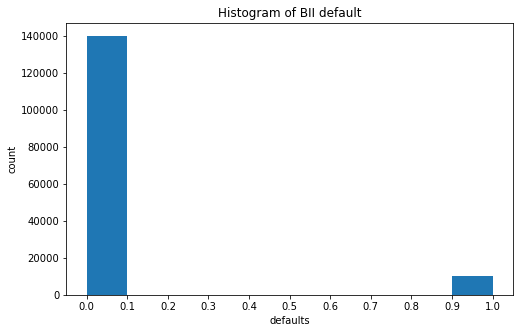

In [11]:
count, bin_edges = np.histogram(df_credit['BII_default'])

df_credit['BII_default'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of BII default') # add a title to the histogram
plt.ylabel('count') # add y-label
plt.xlabel('defaults') # add x-label

plt.show()

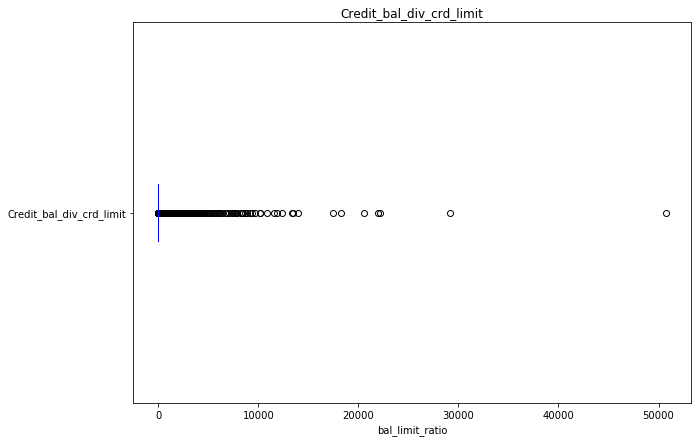

In [12]:
df_credit['Credit_bal_div_crd_limit'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('Credit_bal_div_crd_limit') # add a title to the histogram

plt.xlabel('bal_limit_ratio') # add x-label

plt.show()

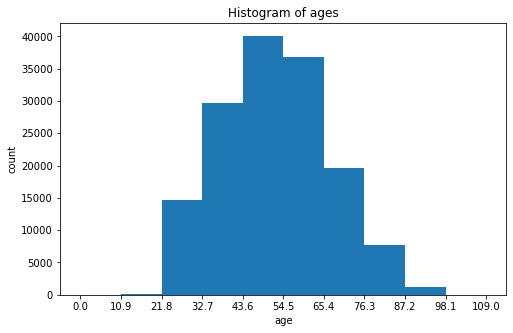

In [13]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_credit['age'])


df_credit['age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of ages') # add a title to the histogram
plt.ylabel('count') # add y-label
plt.xlabel('age') # add x-label

plt.show()

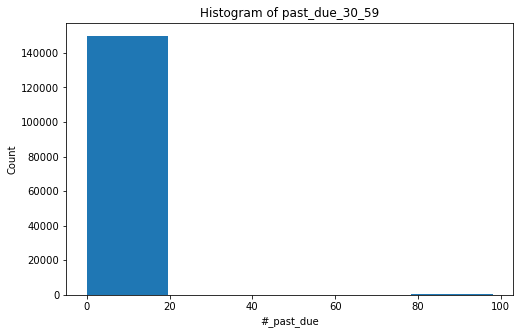

In [14]:
# 'bin_edges' is a list of bin intervals
#count, bin_edges = np.histogram(df_credit['nbr_past_due_30_59_days'], bins = 3)


df_credit['nbr_past_due_30_59_days'].plot(kind='hist', figsize=(8, 5), bins = 5)

plt.title('Histogram of past_due_30_59') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('#_past_due') # add x-label

plt.show()

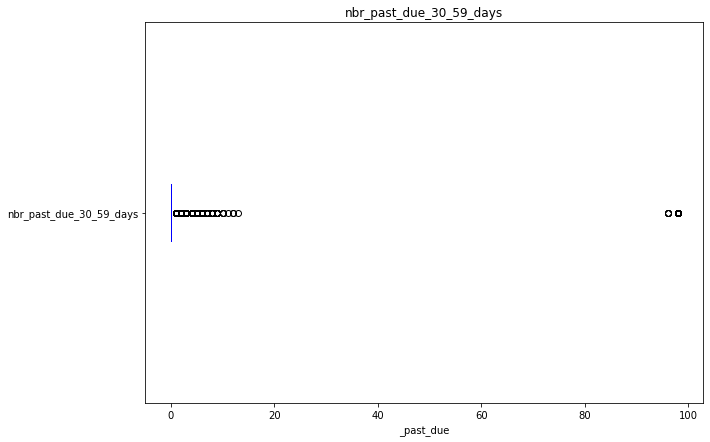

In [15]:
df_credit['nbr_past_due_30_59_days'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('nbr_past_due_30_59_days') # add a title to the histogram

plt.xlabel('_past_due') # add x-label

plt.show()

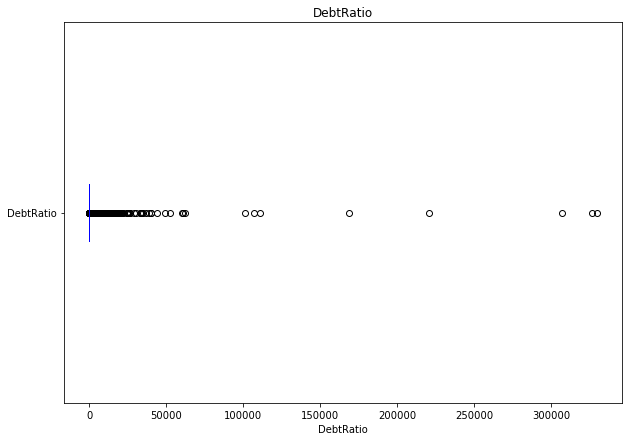

In [16]:
df_credit['DebtRatio'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('DebtRatio') # add a title to the histogram

plt.xlabel('DebtRatio') # add x-label

plt.show()

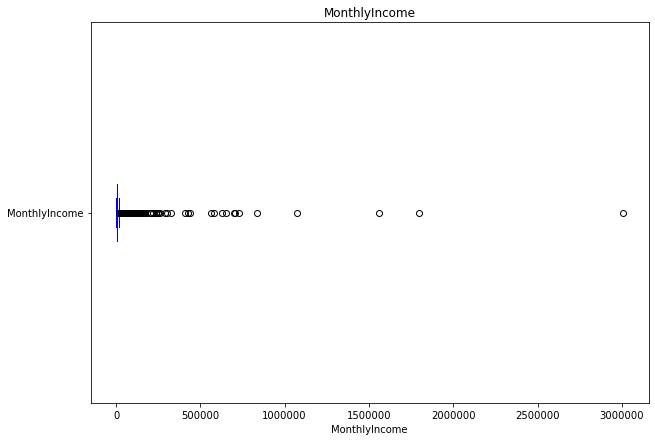

In [17]:
df_credit['MonthlyIncome'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('MonthlyIncome') # add a title to the histogram

plt.xlabel('MonthlyIncome') # add x-label

plt.show()

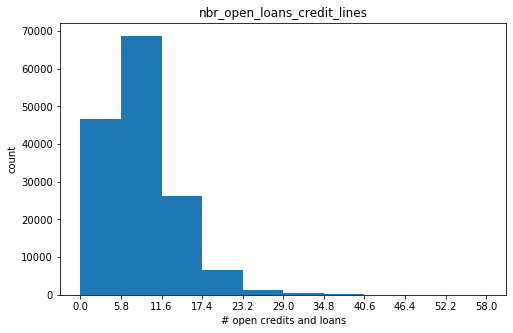

In [18]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_credit['nbr_open_loans_credit_lines'])


df_credit['nbr_open_loans_credit_lines'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('nbr_open_loans_credit_lines') # add a title to the histogram
plt.ylabel('count') # add y-label
plt.xlabel('# open credits and loans') # add x-label

plt.show()

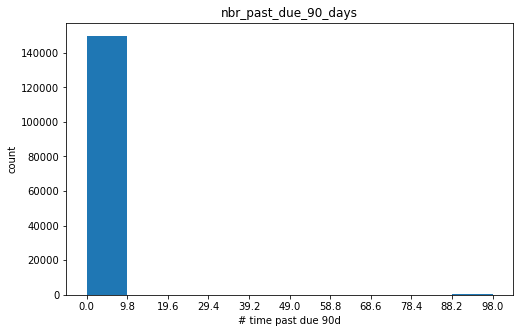

In [19]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_credit['nbr_past_due_90_days'])


df_credit['nbr_past_due_90_days'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('nbr_past_due_90_days') # add a title to the histogram
plt.ylabel('count') # add y-label
plt.xlabel('# time past due 90d') # add x-label

plt.show()

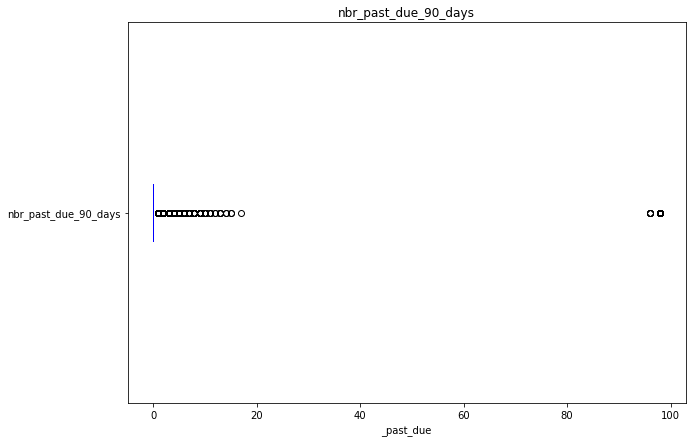

In [20]:
df_credit['nbr_past_due_90_days'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('nbr_past_due_90_days') # add a title to the histogram

plt.xlabel('_past_due') # add x-label

plt.show()

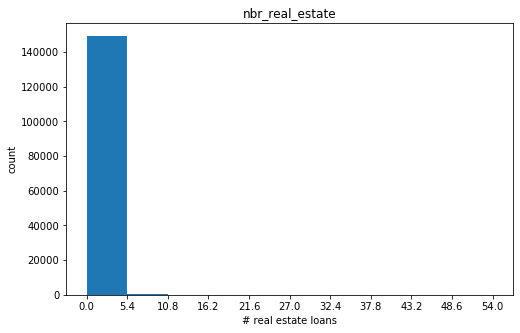

In [21]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_credit['nbr_real_estate'])


df_credit['nbr_real_estate'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('nbr_real_estate') # add a title to the histogram
plt.ylabel('count') # add y-label
plt.xlabel('# real estate loans') # add x-label

plt.show()


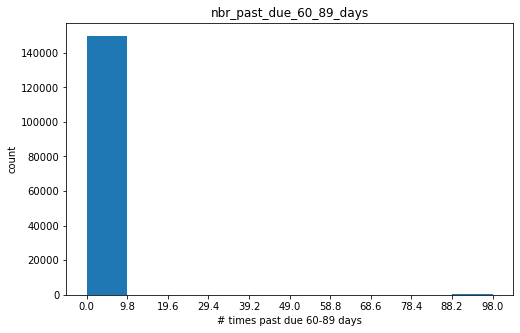

In [22]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_credit['nbr_past_due_60_89_days'])


df_credit['nbr_past_due_60_89_days'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('nbr_past_due_60_89_days') # add a title to the histogram
plt.ylabel('count') # add y-label
plt.xlabel('# times past due 60-89 days') # add x-label

plt.show()


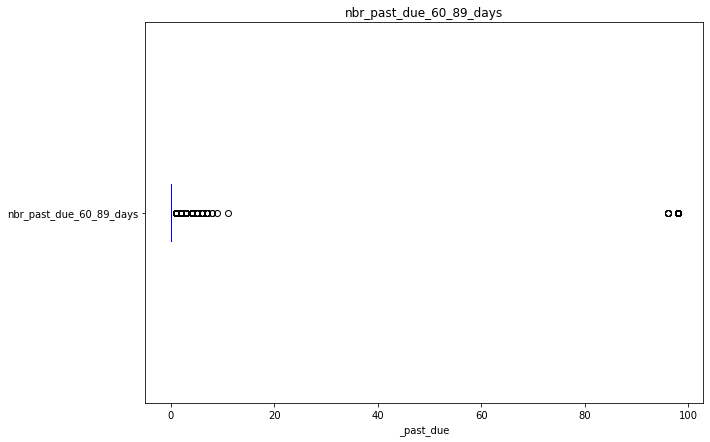

In [23]:
df_credit['nbr_past_due_60_89_days'].plot(kind='box', figsize=(10, 7), color='blue', vert=False)
plt.title('nbr_past_due_60_89_days') # add a title to the histogram

plt.xlabel('_past_due') # add x-label

plt.show()

# Data quality handling
## neraly all variables have data quality issues, they will be handled in the next steps

### Past due data are not coherent, so we drop them

In [6]:
df_credit.drop(['nbr_past_due_30_59_days', 'nbr_past_due_60_89_days', 'nbr_past_due_90_days'], axis=1, inplace = True)
    
df_credit.head()

,BII_default,Credit_bal_div_crd_limit,age,DebtRatio,MonthlyIncome,nbr_open_loans_credit_lines,nbr_real_estate,NumberOfDependents
id,,,,,,,,
1,1,0.766127,45,0.802982,9120.0,13,6,2.0
2,0,0.957151,40,0.121876,2600.0,4,0,1.0
3,0,0.658180,38,0.085113,3042.0,2,0,0.0
4,0,0.233810,30,0.036050,3300.0,5,0,0.0
5,0,0.907239,49,0.024926,63588.0,7,1,0.0


### percentage variables have incoherent values, lot of higher than 100%.
According to business knowledge, we know that some of them could be higher than 100% but a treshold of 500% is a maximum. So we removr all values higher than 5.

In [7]:
# drop records having percentage higher than 5 or = 0
df_credit.drop(df_credit[df_credit.Credit_bal_div_crd_limit > 5].index, inplace=True)

df_credit.drop(df_credit[df_credit.DebtRatio > 5].index, inplace=True)

df_credit.drop(df_credit[df_credit.Credit_bal_div_crd_limit == 0].index, inplace=True)

df_credit.drop(df_credit[df_credit.DebtRatio == 0].index, inplace=True)



#df.drop(df.loc[df['Stock']=='Yes'].index, inplace=True)


### Age
Variable has ages > 90. Banks never grant credits to so aged people nor credit going up to client ages = 90.
So we remove all records whose clients are 90 years or more.

Lot of client have missing age, age is important in credit granting process, so it is coherent to replace them by the average age of the dataset.

In [8]:
df_credit.drop(df_credit[df_credit['age'] > 90].index, inplace=True)
               
df_credit['age'].mask(df_credit['age'] == 0, df_credit['age'].mean(), inplace = True)


## Monthly income,
Some of them are NA or 0, as this is important variable to allow credit granting, we replace them by the median income (less weight to outliers)

In [9]:
df_credit['MonthlyIncome'].fillna(df_credit['MonthlyIncome'].median(), inplace=True)

df_credit['MonthlyIncome'].mask(df_credit['MonthlyIncome'] == 0, df_credit['MonthlyIncome'].median(), inplace = True)


## NumberOfDependents
Some records have a number of dependent (person at charge) quite high. So we wouls replace those >5 by the median
we'll also replace NA by median

In [10]:
df_credit['NumberOfDependents'].mask(df_credit['NumberOfDependents'] > 5, df_credit['NumberOfDependents'].median(), inplace = True)

df_credit['NumberOfDependents'].fillna(df_credit['NumberOfDependents'].median(), inplace=True)

In [11]:
df_credit.describe()

,BII_default,Credit_bal_div_crd_limit,age,DebtRatio,MonthlyIncome,nbr_open_loans_credit_lines,nbr_real_estate,NumberOfDependents
count,109141.000000,109141.000000,109141.000000,109141.000000,1.091410e+05,109141.000000,109141.000000,109141.000000
mean,0.071201,0.350109,51.474501,0.385554,6.840572e+03,8.984268,1.070569,0.846657
std,0.257162,0.356965,14.215512,0.436802,1.374953e+04,5.188402,1.143604,1.120165
min,0.000000,0.000010,21.000000,0.000026,1.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.049204,41.000000,0.152800,3.583000e+03,5.000000,0.000000,0.000000
50%,0.000000,0.206093,51.000000,0.300266,5.500000e+03,8.000000,1.000000,0.000000
75%,0.000000,0.600417,62.000000,0.479920,8.333000e+03,12.000000,2.000000,2.000000
max,1.000000,4.937063,90.000000,5.000000,3.008750e+06,57.000000,32.000000,5.000000


In [37]:
### correlation matrix

df_credit[['Credit_bal_div_crd_limit', 'age', 'DebtRatio', 'MonthlyIncome', 'nbr_open_loans_credit_lines',  'nbr_real_estate',  'NumberOfDependents']].corr()


,Credit_bal_div_crd_limit,age,DebtRatio,MonthlyIncome,nbr_open_loans_credit_lines,nbr_real_estate,NumberOfDependents
Credit_bal_div_crd_limit,1.000000,-0.282265,0.082764,-0.038616,-0.175984,-0.072446,0.088621
age,-0.282265,1.000000,-0.003084,0.033993,0.179578,0.061020,-0.217224
DebtRatio,0.082764,-0.003084,1.000000,-0.067673,0.173724,0.298958,0.008814
MonthlyIncome,-0.038616,0.033993,-0.067673,1.000000,0.091355,0.130829,0.065766
nbr_open_loans_credit_lines,-0.175984,0.179578,0.173724,0.091355,1.000000,0.418920,0.034361
nbr_real_estate,-0.072446,0.061020,0.298958,0.130829,0.418920,1.000000,0.118596
NumberOfDependents,0.088621,-0.217224,0.008814,0.065766,0.034361,0.118596,1.000000


# deep learning model

In [14]:
# create x & y train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_credit, test_size=0.2)
x_train = train[['Credit_bal_div_crd_limit', 'age', 'DebtRatio', 'MonthlyIncome', 'nbr_open_loans_credit_lines',  'nbr_real_estate',  'NumberOfDependents']]
y_train = train[["BII_default"]]

x_test = test[['Credit_bal_div_crd_limit', 'age', 'DebtRatio', 'MonthlyIncome', 'nbr_open_loans_credit_lines',  'nbr_real_estate',  'NumberOfDependents']]
y_test = test[["BII_default"]]

In [15]:
!pip install tensorflow==2.2.0rc0

In [16]:
import tensorflow as tf
if not tf.__version__ == '2.2.0-rc0':
    print(tf.__version__)
    raise ValueError('please upgrade to TensorFlow 2.2.0-rc0, or restart your Kernel (Kernel->Restart & Clear Output)')
#! conda update tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [17]:
n_cols = df_credit.shape[1]

In [36]:
model = Sequential()
model.add(Dense(7, activation = 'relu', input_dim=7))
#model.add(Dropout(0.5))
model.add(Dense(7, activation = 'relu',  input_dim =7))
model.add(Dense(1, activation = 'sigmoid',input_dim =7))

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
batch_size = 32
model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test)

Epoch 1/5
2729/2729 [==============================] - 27s 10ms/step - loss: nan - accuracy: 0.9287 - val_loss: nan - val_accuracy: 0.9291
Epoch 2/5
2729/2729 [==============================] - 25s 9ms/step - loss: nan - accuracy: 0.9287 - val_loss: nan - val_accuracy: 0.9291
Epoch 3/5
2729/2729 [==============================] - 24s 9ms/step - loss: nan - accuracy: 0.9287 - val_loss: nan - val_accuracy: 0.9291
Epoch 4/5
2729/2729 [==============================] - 25s 9ms/step - loss: nan - accuracy: 0.9287 - val_loss: nan - val_accuracy: 0.9291
Epoch 5/5
683/683 [==============================] - 3s 4ms/step - loss: nan - accuracy: 0.9291


In [39]:
print('Accuracy: {}% \n Error: {}'.format(score[1], 1 - score[1])) 


Accuracy: 0.9290851354598999% 
 Error: 0.0709148645401001


# prepare data for spark handling

In [13]:
!pip install pyspark==2.4.5

     |████████████████████████████████| 217.8MB 79kB/s s eta 0:00:01  |▍                               | 2.4MB 9.1MB/s eta 0:00:24     |██▍                             | 16.2MB 5.8MB/s eta 0:00:35     |██▌                             | 17.1MB 5.8MB/s eta 0:00:35     |███▎                            | 22.3MB 5.8MB/s eta 0:00:34     |████▌                           | 30.7MB 6.8MB/s eta 0:00:28     |████▋                           | 31.4MB 6.8MB/s eta 0:00:28     |████▉                           | 32.6MB 6.8MB/s eta 0:00:28     |█████                           | 34.0MB 6.8MB/s eta 0:00:28     |█████▏                          | 35.3MB 6.8MB/s eta 0:00:27     |█████▎                          | 36.0MB 6.8MB/s eta 0:00:27     |█████▉                          | 40.0MB 7.0MB/s eta 0:00:26MB/s eta 0:00:26MB/s eta 0:00:25     |██████████▏                     | 69.0MB 6.9MB/s eta 0:00:22     |████████████                    | 81.6MB 7.0MB/s eta 0:00:20     |█████████████▍                  | 91.2MB

In [14]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
    from pyspark.sql import SQLContext

except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [15]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

In [16]:
sqlContext = SQLContext(sc)

In [17]:
s_df_credit = sqlContext.createDataFrame(df_credit)

s_df_credit.registerTempTable("credit_data")

In [18]:
s_df_credit.show(2)

+-----------+------------------------+----+-----------+-------------+---------------------------+---------------+------------------+
|BII_default|Credit_bal_div_crd_limit| age|  DebtRatio|MonthlyIncome|nbr_open_loans_credit_lines|nbr_real_estate|NumberOfDependents|
+-----------+------------------------+----+-----------+-------------+---------------------------+---------------+------------------+
|          1|             0.766126609|45.0|0.802982129|       9120.0|                         13|              6|               2.0|
|          0|             0.957151019|40.0|0.121876201|       2600.0|                          4|              0|               1.0|
+-----------+------------------------+----+-----------+-------------+---------------------------+---------------+------------------+
only showing top 2 rows



In [19]:
#split data for modeling

split = s_df_credit.randomSplit([0.8,0.2])
credit_train = split[0]
credit_test = split[1]

In [20]:
incol = ['Credit_bal_div_crd_limit', 'age', 'DebtRatio', 'MonthlyIncome', 'nbr_open_loans_credit_lines',  'nbr_real_estate',  'NumberOfDependents']
label = "BII_default"

## Gradient Boosted tree model

In [21]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = incol, outputCol = "features")

In [23]:
from pyspark.ml.classification import GBTClassifier

classifier = GBTClassifier(labelCol = label, featuresCol = "features", maxIter = 10)

In [24]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, classifier])

### training data

In [25]:
model = pipeline.fit(credit_train)

In [26]:
prediction = model.transform(credit_train)

In [27]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
Eval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("BII_default")
    
Eval.evaluate(prediction) 

0.9297394408907299

### test data

In [28]:
model = pipeline.fit(credit_test)

prediction = model.transform(credit_test)


Eval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("BII_default")
    
Eval.evaluate(prediction) 

0.9301213681500552

## Logistic regression model

In [29]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Indexer = StringIndexer(inputCol="BII_default", outputCol="label")
vectorAssembler = VectorAssembler(inputCols = incol , outputCol = "features")
normaliser = Normalizer(inputCol ="features",outputCol ='features_norm', p = 1.0)

In [30]:
from pyspark.ml.classification import LogisticRegression

In [31]:
lr = LogisticRegression(maxIter = 10, regParam =0.3, elasticNetParam = 0.8)

In [32]:
pipeline = Pipeline(stages=[Indexer, vectorAssembler, normaliser, lr])

### training data

In [33]:
model = pipeline.fit(credit_train)


prediction = model.transform(credit_train)


Eval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
Eval.evaluate(prediction) 

0.9289727540079415

### test data

In [34]:
model = pipeline.fit(credit_test)
prediction = model.transform(credit_test)
Eval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("label")
    
Eval.evaluate(prediction) 

0.9280985656491357

## Support Vector Machine

In [35]:
Indexer = StringIndexer(inputCol ="BII_default", outputCol ='label')
encoder = OneHotEncoder(inputCol ='BII_default', outputCol ='LabelVec')
vectorAssembler = VectorAssembler(inputCols = incol, outputCol = "features")
normaliser = Normalizer(inputCol ='features',outputCol ='features_norm', p = 1.0)

In [36]:
from pyspark.ml.classification import LinearSVC

In [37]:
lsvc = LinearSVC(maxIter = 10, regParam = 0.1)

In [38]:
pipeline = Pipeline(stages=[Indexer, encoder, vectorAssembler, normaliser, lsvc])

### training data

In [41]:
model = pipeline.fit(credit_train)

prediction = model.transform(credit_train)

from pyspark.ml.evaluation import BinaryClassificationEvaluator
eval = BinaryClassificationEvaluator(rawPredictionCol = 'rawPrediction' )
Eval.evaluate(prediction)

0.928938424744533

### test data

In [40]:
model = pipeline.fit(credit_test)


prediction = model.transform(credit_test)

eval = BinaryClassificationEvaluator(rawPredictionCol = 'rawPrediction' )
Eval.evaluate(prediction)

0.9281445384332475